# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [57]:
# setting each station name and their url
thsr_data = {'station':["南港", "台北", "板橋", "桃園", "新竹", "苗栗", "台中", "彰化", "雲林", "嘉義", "台南", "左營"], 'address':[], 'operation_hours':[], 'ticketing_hours':[]}
thsr_url = []
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68') # nangang_url 
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490') # taipei_url
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f') # banqiao_url
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd') # taoyuan_url
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4') # hsinchu_url
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3') # miaoli_url
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779') # taichung_url
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e') # changhua_url
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f') # yunlin_url
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7') # chiayi_url 
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814') # tainan_url 
thsr_url.append('https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356') # zuoying_url

In [58]:
# crawler the address of each station
for url in thsr_url:
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    address_tag = soup.find('a', class_='google-map-link orange') #找到名叫google-map-link orange的<a>
    thsr_data['address'].append(address_tag.text)

In [59]:
# crawler the operation hours and ticketing hours of each station
for url in thsr_url:
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    table_tag = soup.find('table')
    trs = table_tag.find_all('tr')
    thsr_data['operation_hours'].append(re.sub('營業時間：', '', trs[1].text).strip())
    thsr_data['ticketing_hours'].append(re.sub('售票時間：', '', trs[2].text).strip())

In [60]:
# create a DataFrame
pd.DataFrame(thsr_data)

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [2]:
# crawler GDP
gdp_dict = {'Country':[], 'Region':[], 'IMF_Estimate':[], 'IMF_Year':[], 'United_Nations_Estimate':[], 'United_Nations_Year':[], 'World_Bank_Estimate':[], 'World_Bank_Year':[]}
keys = list(gdp_dict.keys())

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
table_tag = soup.find('table', class_ = 'wikitable sortable static-row-numbers plainrowheaders srn-white-background')
trs = table_tag.find_all('tr')
name_tag = re.findall('[\d\,]+', trs[3].text)
    
for i in range(2,52):
    # 讀取國家名及所屬洲名
    name_tag = trs[i].find_all('a')
    gdp_dict['Country'].append(name_tag[0].text.strip())
    gdp_dict['Region'].append(name_tag[1].text.strip())
    
    # 讀取IMF & UN & WB
    gdp_tag = re.findall('[\d\,]+', trs[i].text)
    k = 2
    for gdp in gdp_tag:
        if len(gdp) >=3:
            gdp_dict[keys[k]].append(gdp)
            k = k + 1

In [34]:
# create GDP DataFrame
gdp_df = pd.DataFrame(gdp_dict)
gdp_df

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020
1,China,Asia,"16,642,318",2021,"14,342,933",2019,"14,722,731",2020
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020


In [4]:
# crawler CPI
cpi_dict = {'Country':[], 'CPI_2020':[]}

url = 'https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
table_tag = soup.find('table', class_ = 'wikitable sortable')
trs = table_tag.find_all('tr')

for i in range(2,102):
    # 讀取國家名
    name_tag = trs[i].find_all('a')
    cpi_dict['Country'].append(name_tag[0].text.strip())
    
    # 讀取CPI
    cpi_tag = re.findall('[\d]+', trs[i].text)
    cpi_dict['CPI_2020'].append(cpi_tag[1])

In [10]:
# CPI DataFrame
cpi_df = pd.DataFrame(cpi_dict)
cpi_df

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [54]:
# merge GDP and CPI DataFrame
merge_df = gdp_df.merge(cpi_df, on='Country', how="inner")
merge_df

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020,67
1,China,Asia,"16,642,318",2021,"14,342,933",2019,"14,722,731",2020,42
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020,74
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020,80
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020,77
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020,40
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020,69
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020,53
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020,77
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020,61


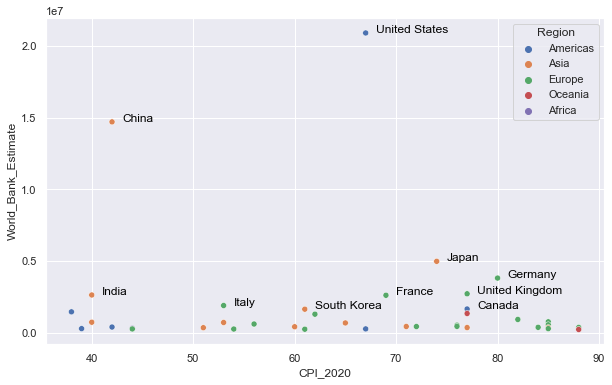

In [55]:
# plot
# 資料轉形態為int
merge_df["CPI_2020"] = pd.Series(merge_df["CPI_2020"], dtype="int64")
merge_df["World_Bank_Estimate"] =  merge_df["World_Bank_Estimate"].apply(lambda x: x.replace(",", "")).astype("int64")

plt.figure(figsize=(10,6))
sns.scatterplot(data=merge_df, x="CPI_2020", y="World_Bank_Estimate", hue="Region")
for i in range(10):
    plt.text(merge_df["CPI_2020"][i]+1, merge_df["World_Bank_Estimate"][i], merge_df["Country"][i], color='black', fontsize=12)
plt.show()